In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math
%matplotlib inline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import CategoricalDtype

import warnings
warnings.filterwarnings('ignore')

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

from scipy import stats
from scipy.stats import norm, skew 

In [39]:
train = pd.read_csv('C:/Users/harsha/Desktop/python/Data/train.csv')


In [4]:

pd.set_option('display.max_columns', None)

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
print(train.shape)

(1460, 81)


In [40]:
train.drop(['Id'], axis=1, inplace=True)
#test.drop(['Id'], axis=1, inplace=True)

In [41]:
train.reset_index(drop=True, inplace=True)

In [ ]:

#train.reset_index(drop=True, inplace=True)
#train["SalePrice"] = np.log1p(train["SalePrice"])
#y = train['SalePrice'].reset_index(drop=True)

In [9]:
train.columns


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [10]:
# checking % of missing Value in each feature in train data 

# 1 - List of features which has missing values

null_column = [features for features in train.columns if train[features].isnull().sum()>1]

#2 - print feature and percentage of missing value

for feature in null_column:
    print(feature, np.round(train[feature].isnull().mean(), 3), '%missing values')

LotFrontage 0.177 %missing values
Alley 0.938 %missing values
MasVnrType 0.005 %missing values
MasVnrArea 0.005 %missing values
BsmtQual 0.025 %missing values
BsmtCond 0.025 %missing values
BsmtExposure 0.026 %missing values
BsmtFinType1 0.025 %missing values
BsmtFinType2 0.026 %missing values
FireplaceQu 0.473 %missing values
GarageType 0.055 %missing values
GarageYrBlt 0.055 %missing values
GarageFinish 0.055 %missing values
GarageQual 0.055 %missing values
GarageCond 0.055 %missing values
PoolQC 0.995 %missing values
Fence 0.808 %missing values
MiscFeature 0.963 %missing values


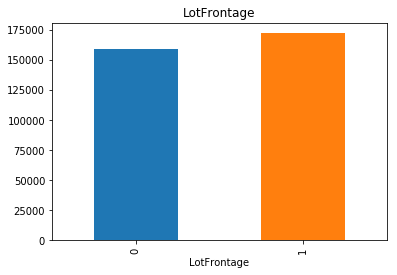

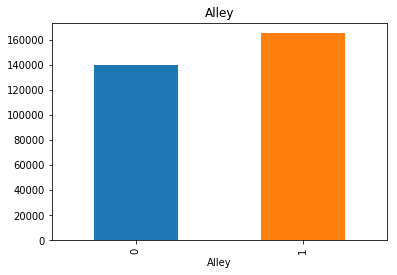

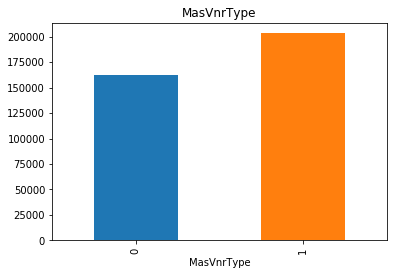

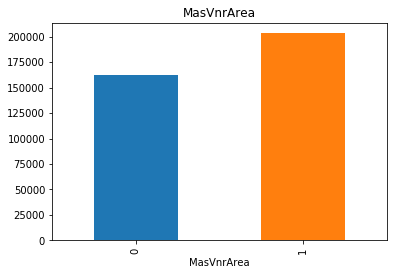

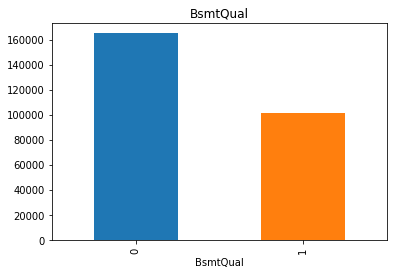

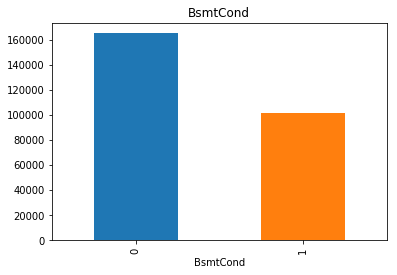

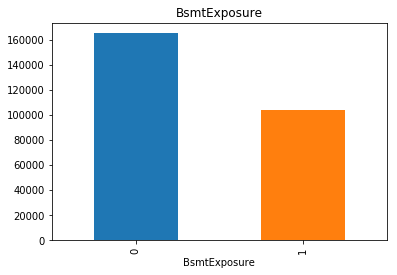

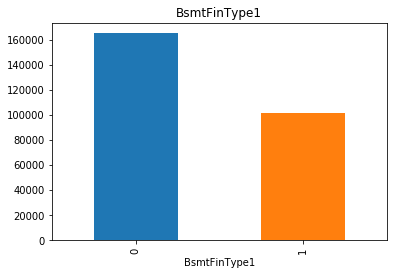

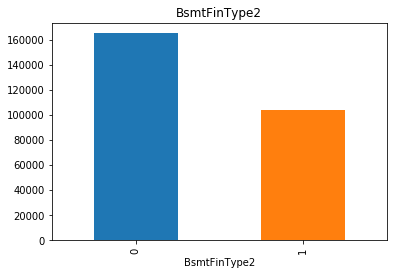

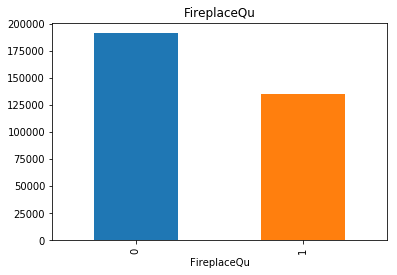

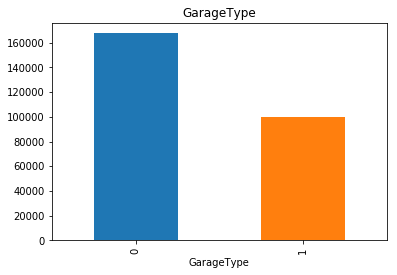

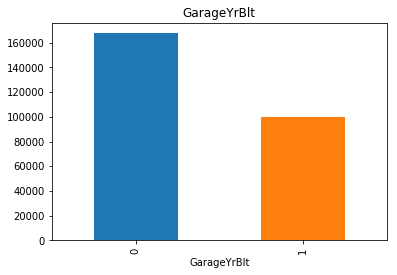

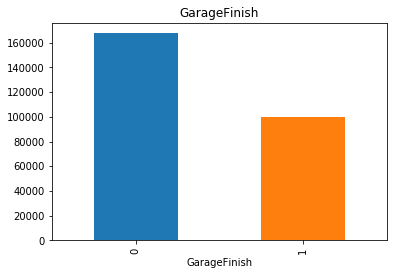

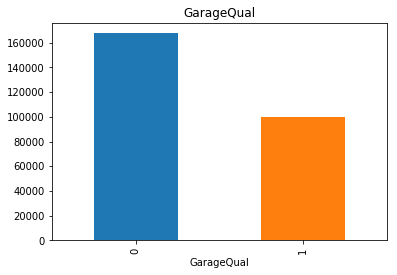

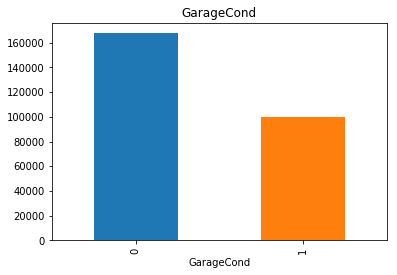

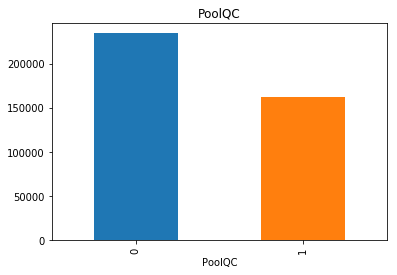

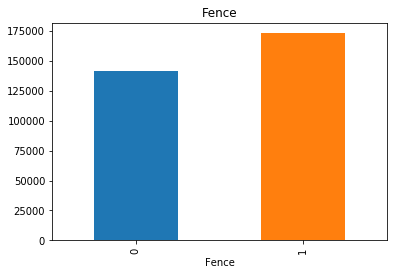

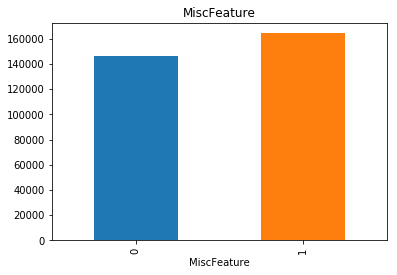

In [11]:
for feature in null_column:
   
    
 # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    train[feature] = np.where(train[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    train.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section.

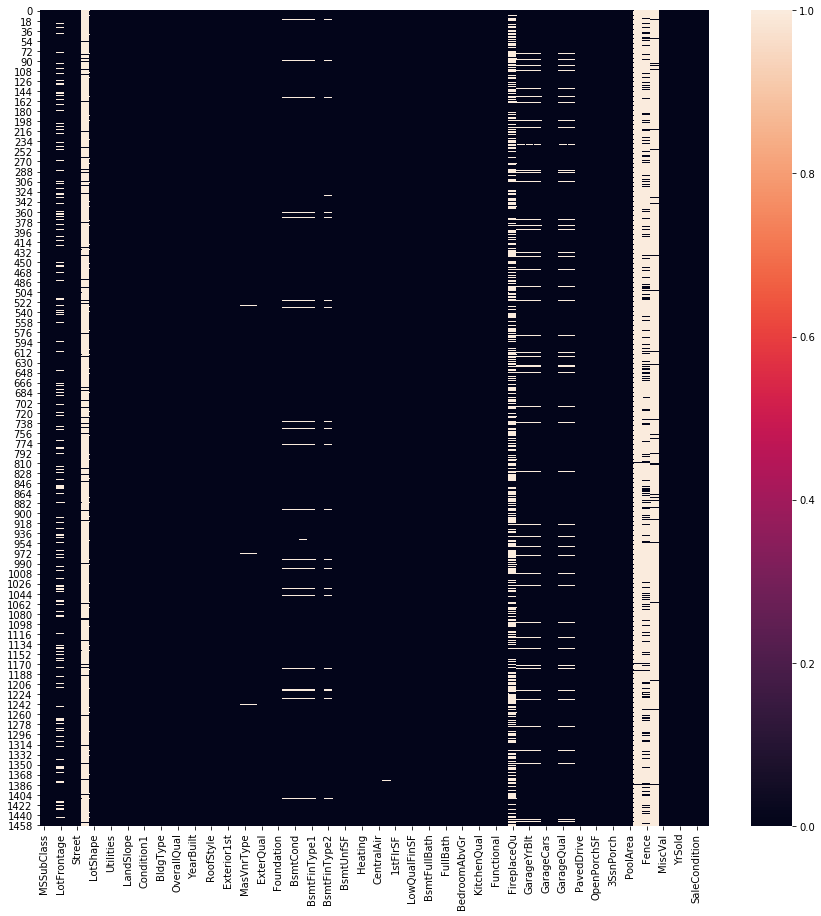

In [17]:
# to see missing value , we plot figure

plt.figure(figsize = (15,15))
sns.heatmap(train.isnull())


we can see there are lot of missing values in many columns (white dashes represent missing values)

# Numerical variables 

In [18]:
# List of numerical Variables 

numerical_features = [feature for feature in train.columns if train[feature].dtypes != "O"]

print('number of numerical variables:', len(numerical_features))


number of numerical variables: 37


In [19]:
train[numerical_features].head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


# Temporal Variables (Datatime)

In [20]:

# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs Sold year')

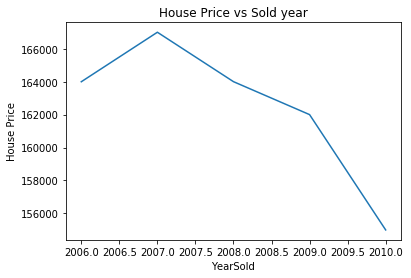

In [21]:
# Lets check the realtionship between yearsold and Salesprice

train.groupby("YrSold")["SalePrice"].median().plot()
plt.xlabel("YearSold")
plt.ylabel("House Price")
plt.title("House Price vs Sold year")

we can see as the year increase the price of house is getting reduced , which is not correct. Hence, will find the other factor affecting on price such as, House built year and renovation and other facility included or removed. 

To check the above factore will use other year_feature and relation with price through scatter plot

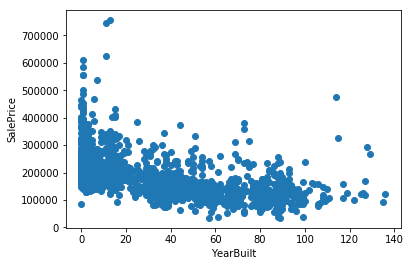

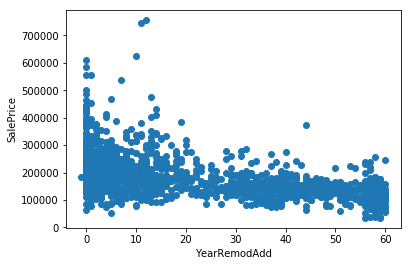

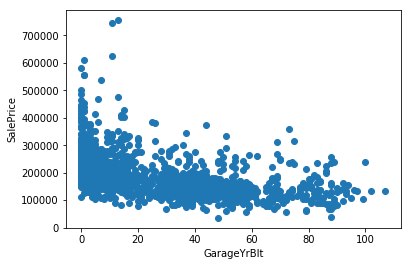

In [22]:
# Will take the difference between year features with sales price

for feature in year_feature:
    if feature != "YrSold":
       
        train[feature] = train["YrSold"] - train[feature]
        
        plt.scatter(train[feature], train['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()



we can see with age of house increase the price of selling getting reduced , even facilities like garages age also not adding value .

# Numerical Variables 

In [23]:
# numerical Variables are two types 

#1. continuous variables
# 2. discrete variables 


discrete_feature = [feature for feature in numerical_features if len(train[feature].unique())< 30 and feature not in year_feature+ ['ID']]
print("discrete variables count: {}".format(len(discrete_feature)))

discrete variables count: 17


In [24]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [26]:
train[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


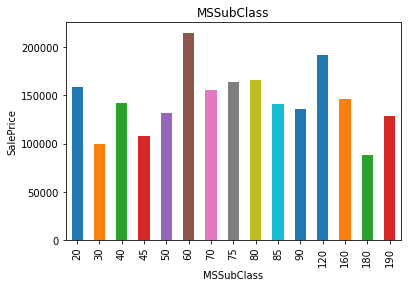

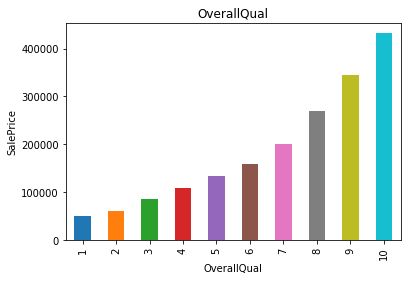

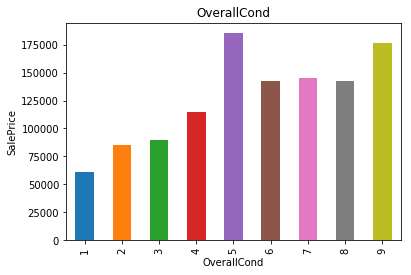

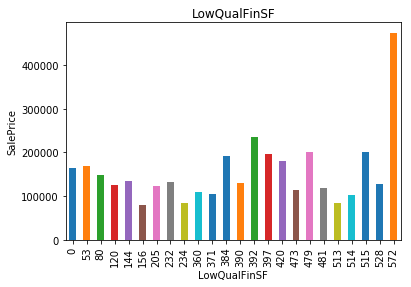

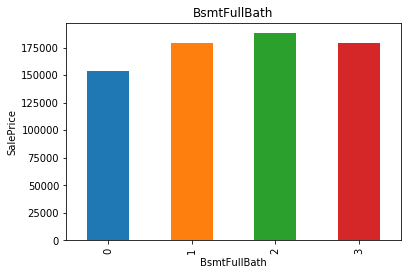

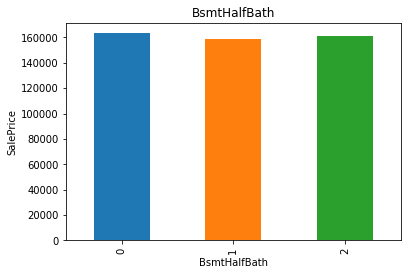

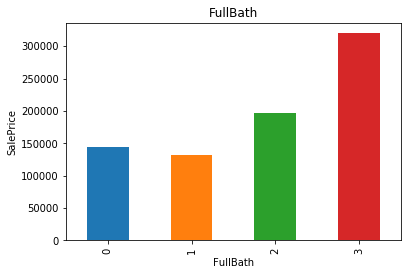

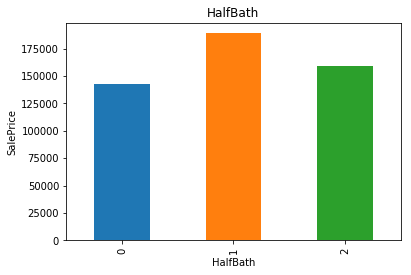

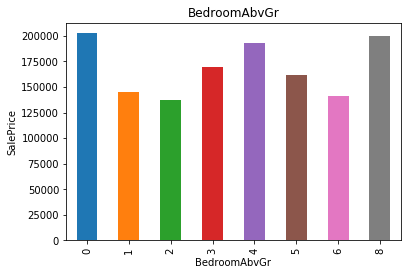

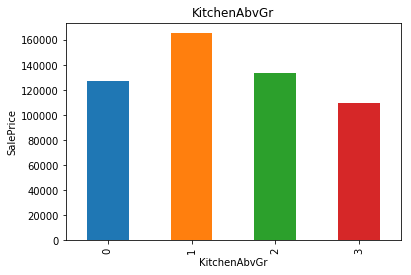

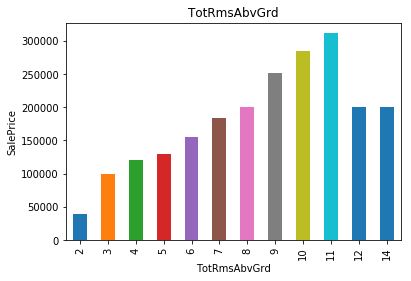

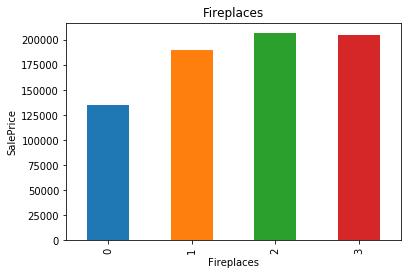

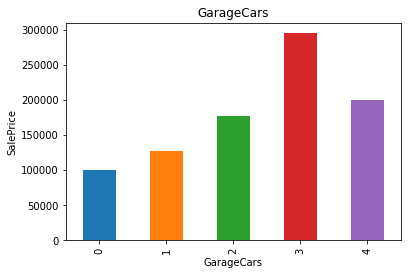

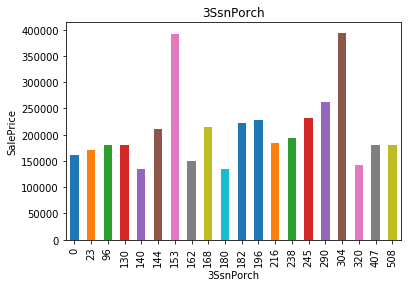

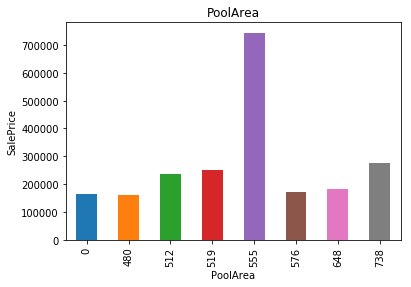

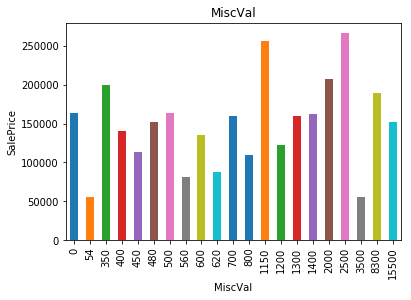

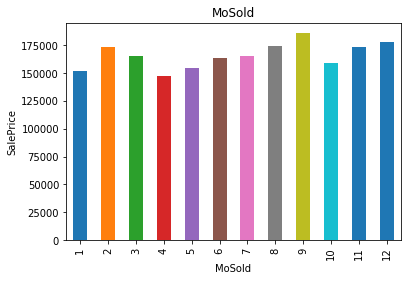

In [27]:
# find the relation between discrete feature and salesprice

for feature in discrete_feature:
   
    train.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()



we can see some of the category of feature is highly correlated with target variable and some feature with missing values are visible

# continuous variables 

In [28]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature+year_feature+ ['ID']]
print("continuous variables count: {}".format(len(continuous_feature)))

continuous variables count: 16


In [29]:
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

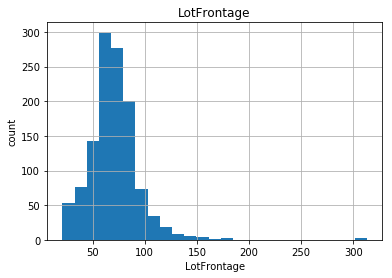

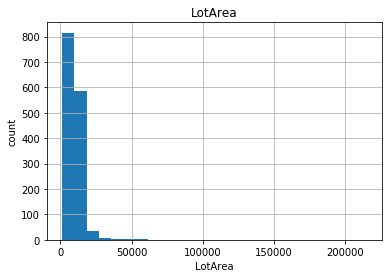

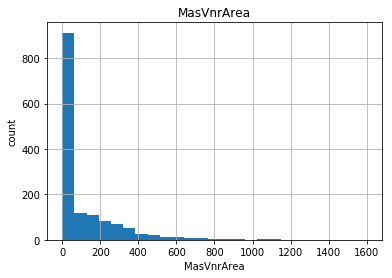

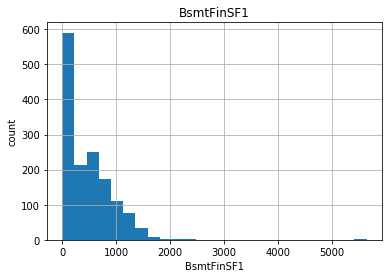

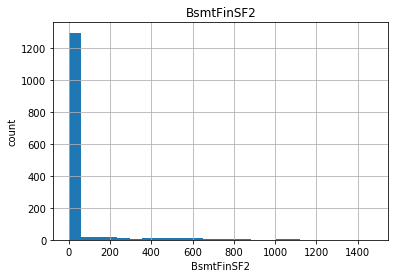

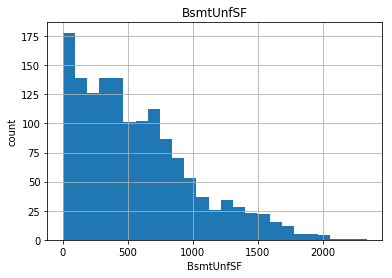

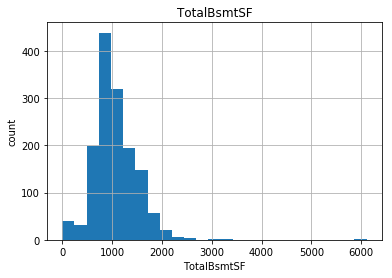

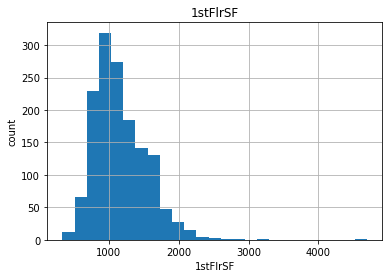

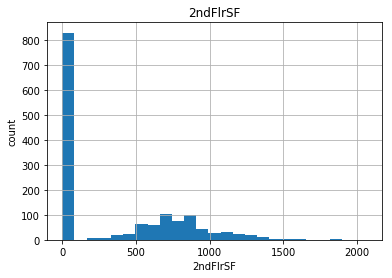

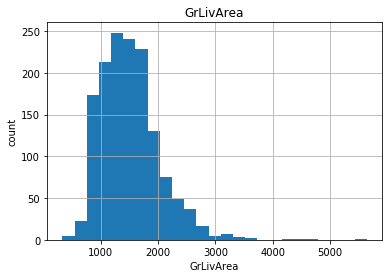

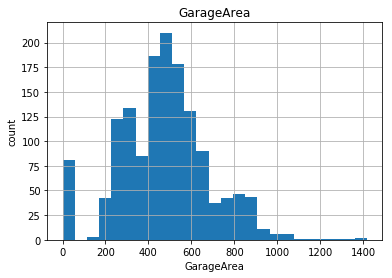

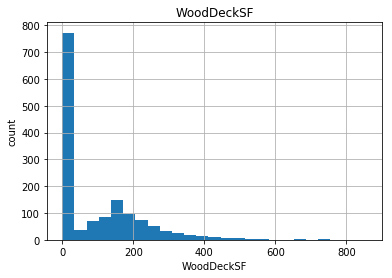

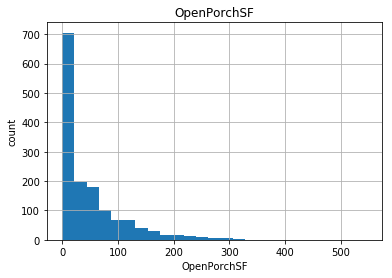

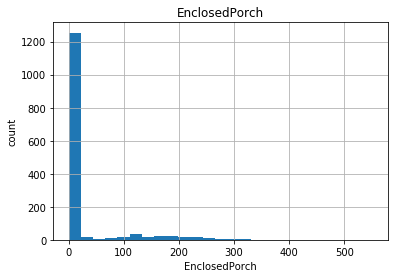

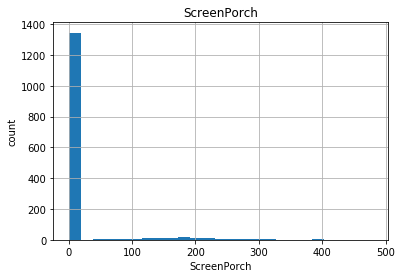

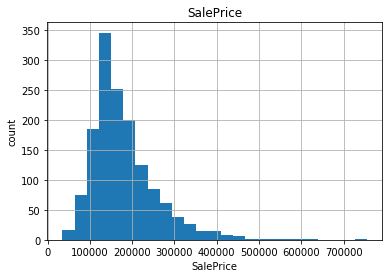

In [30]:
# lets check gussian distribution by creating histogram of continuous variables

for feature in continuous_feature:
 
    train[feature].hist(bins= 25)
    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(feature)
    plt.show()



as we see many features are highly skewed in nature hence require to perform log transformation 

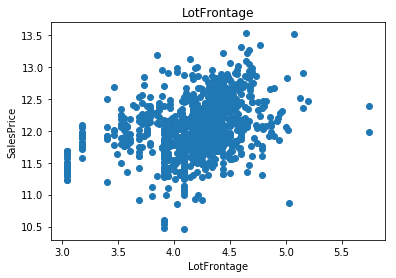

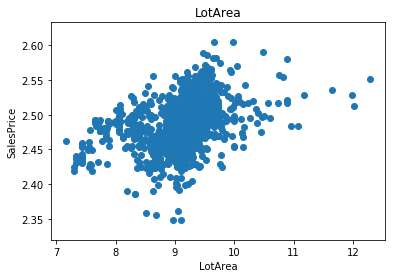

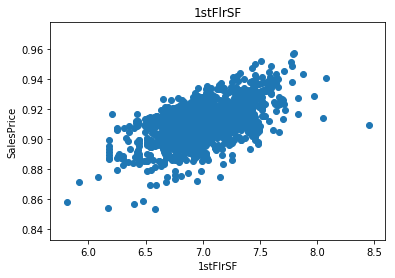

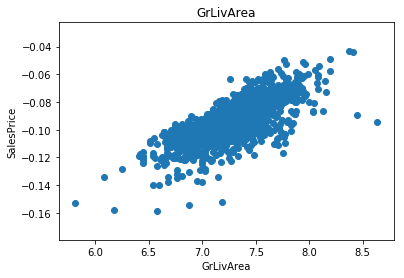

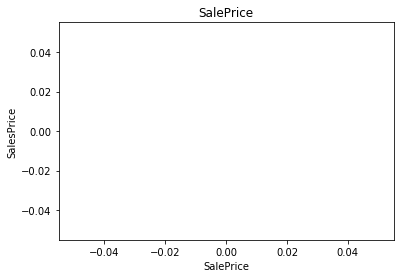

In [37]:
#for feature in continuous_feature:
    
  #  if 0 in train[feature].unique():
     #   pass
   # else:
     #   train[feature]=np.log(train[feature])
      ##  train['SalePrice']=np.log(train['SalePrice'])
      #  plt.scatter(train[feature],train['SalePrice'])
       # plt.xlabel(feature)
      #  plt.ylabel('SalesPrice')
      #  plt.title(feature)
      #  plt.show()
    #
    

salePrice shows nothing as we compared saleprice with saleprice only so empty

In [42]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# checking for outliers 

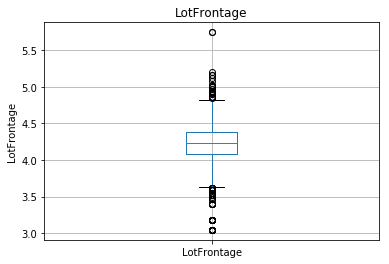

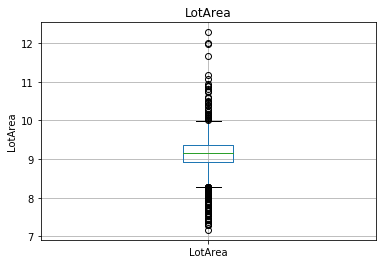

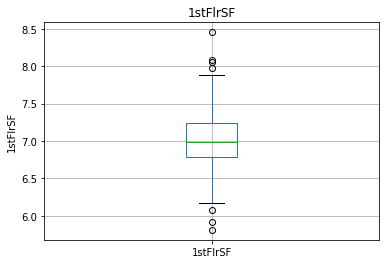

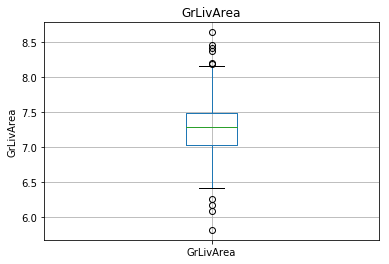

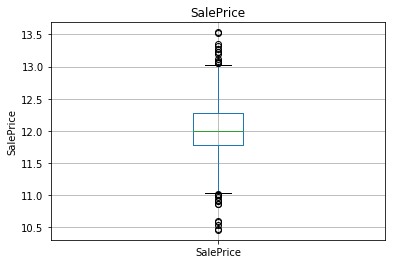

In [43]:
for feature in continuous_feature:
    
    if 0 in train[feature].unique():
        pass
    else:
        train[feature]=np.log(train[feature])
        train.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

we treat this outlier by taking log transformation 

In [44]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


In [45]:
dataset = train.copy()

In [46]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['SalePrice'],test_size=0.1,random_state=0)

In [47]:
X_train.shape, X_test.shape

((1314, 80), (146, 80))

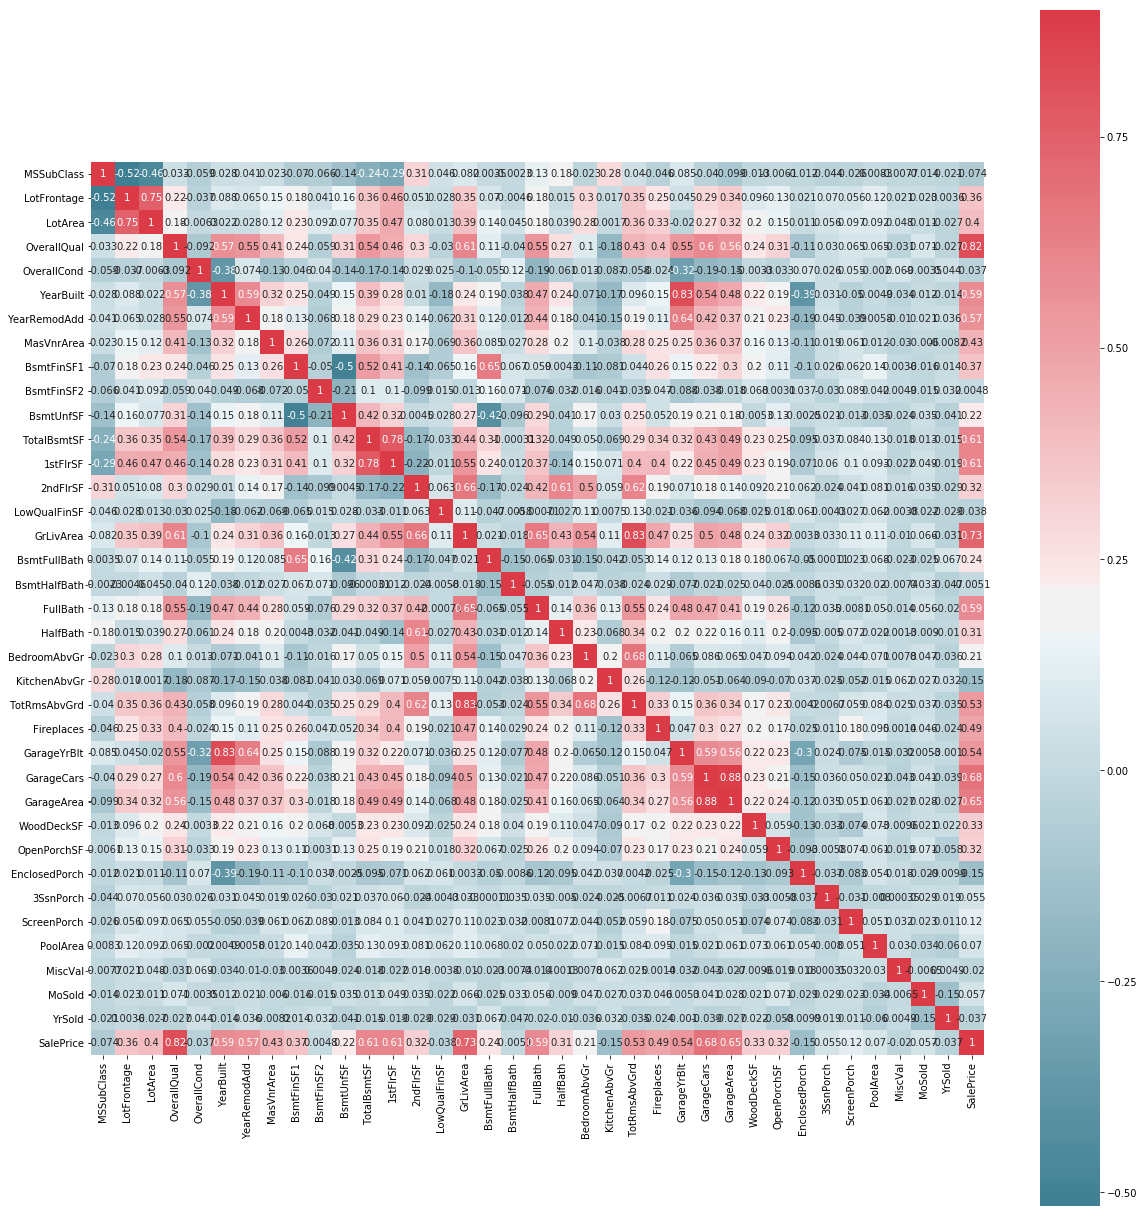

In [48]:
import seaborn as sns

f, ax = plt.subplots(figsize=(20, 22))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True, vmax=0.9)

In [49]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429216


#  let's first concatenate the train and test data in the same dataframe

In [ ]:
#y_train = train.SalePrice.values

In [ ]:
#data = pd.concat((train, test)).reset_index(drop=True)
#data.drop(['SalePrice'], axis=1, inplace=True)
#print("data size is : {}".format(data.shape))

# Missing Value treatment

In [50]:
# let us capture all the Nan Values
# First lets handle categorical features which are missing

cate_features_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes == "O"]

for feature in cate_features_nan:
   print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))


Alley: 0.9377% missing values
MasVnrType: 0.0055% missing values
BsmtQual: 0.0253% missing values
BsmtCond: 0.0253% missing values
BsmtExposure: 0.026% missing values
BsmtFinType1: 0.0253% missing values
BsmtFinType2: 0.026% missing values
FireplaceQu: 0.4726% missing values
GarageType: 0.0555% missing values
GarageFinish: 0.0555% missing values
GarageQual: 0.0555% missing values
GarageCond: 0.0555% missing values
PoolQC: 0.9952% missing values
Fence: 0.8075% missing values
MiscFeature: 0.963% missing values


In [51]:
# missing value treatment

class CustomScaler(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
    # Alley
    
        X.loc[X.Alley.isnull(), 'Alley'] = "NoAlley"
    
        # MissingBasement
    
      
        #BsmtQual
        X.loc[X.BsmtQual.isnull(), 'BsmtQual']= "NoBsmt"
        #BsmtCond
        X.loc[X.BsmtCond.isnull(), 'BsmtCond'] = "NoBsmt" #missing basement
        #BsmtExposure
        X.loc[X.BsmtExposure.isnull(), 'BsmtExposure'] = "NoBsmt" #missing basement
        #BsmtFinType1
        X.loc[X.BsmtFinType1.isnull(), 'BsmtFinType1'] = "NoBsmt" #missing basement
        #BsmtFinType2
        X.loc[X.BsmtFinType2.isnull(), 'BsmtFinType2'] = "NoBsmt"

    
        #FireplaceQu
        X.loc[(X.Fireplaces == 0) & (X.FireplaceQu.isnull()), 'FireplaceQu'] = "NoFire" #missing
       
        #MisGarage
       
        
        #GarageType
        X.loc[X.GarageType.isnull(), 'GarageType'] = "NoGrg" #missing garage
        #GarageFinish
        X.loc[X.GarageFinish.isnull(), 'GarageFinish'] = "NoGrg" #missing
        #GarageQual
        X.loc[X.GarageQual.isnull(), 'GarageQual'] = "NoGrg" #missing
        #GarageCond
        X.loc[X.GarageCond.isnull(), 'GarageCond'] = "NoGrg" #missing
        
        #Fence
        X.loc[X.Fence.isnull(), 'Fence'] = "NoFence" #missing fence
       
        
       
        # Functional 
        X.loc[X.Functional.isnull(), 'Functional'] = "NoFunction" #missing Finction
        
        #MSZoning
        X.loc[X.MSZoning.isnull(), 'MSZoning'] = "NoMSZone" #missing Finction
        
        #Utilities
        X.loc[X.Utilities.isnull(), 'Utilities'] = "NoUtilites" #missing Finction
        
        
        return X
    

In [52]:
dataset = CustomScaler().fit_transform(dataset)

In [53]:
dataset['MasVnrType'] = dataset['MasVnrType'].replace(['None', np.nan], 'NoMasonry')

In [54]:
dataset['MasVnrType'].unique()

array(['BrkFace', 'NoMasonry', 'Stone', 'BrkCmn'], dtype=object)

In [55]:
dataset['PoolQC'] = dataset['PoolQC'].replace( np.nan, 'NoPool')

In [56]:
dataset['PoolQC'].unique()

array(['NoPool', 'Ex', 'Fa', 'Gd'], dtype=object)

In [ ]:
#dataset.isnull().sum()

In [57]:
dataset.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NoFire,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,NaN,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NoMasonry,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,NaN,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,NaN,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NoMasonry,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,NaN,0,2,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,NaN,0,12,2008,WD,Normal,12.429216
5,50,RL,4.442651,9.554993,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NoMasonry,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,6.679599,566,0,7.216709,1,0,1,1,1,1,TA,5,Typ,0,NoFire,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NoPool,MnPrv,Shed,700,10,2009,WD,Normal,11.870600
6,20,RL,4.317488,9.218705,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,7.434848,0,0,7.434848,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NoPool,NoFence,NaN,0,8,2007,WD,Normal,12.634603
7,60,RL,NaN,9.247829,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,7.009409,983,0,7.644919,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NoPool,NoFence,Shed,350,11,2009,WD,Normal,12.206073
8,50,RM,3.931826,8.719317,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NoMasonry,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,6.929517,752,0,7.480992,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468

can see categorical column got cleaned in cleaned _data 

In [58]:
# let us capture all the Nan Values
# First lets handle Numerical features which are missing

num_features_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes != "O"]

for feature in num_features_nan:
   print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1774% missing values
MasVnrArea: 0.0055% missing values
GarageYrBlt: 0.0555% missing values


# imputing numerical column missing value by reference class 

In [ ]:
#dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [59]:
lotconfig = ['Corner', 'Inside', 'CulDSac', 'FR2', 'FR3']
for i in lotconfig:
    dataset['LotFrontage'] = pd.np.where((dataset['LotFrontage'].isnull() == True) & (dataset['LotConfig'] == i) , dataset[dataset['LotConfig'] == i] ['LotFrontage'].mean(), dataset['LotFrontage'])

In [60]:
dataset["MasVnrArea"] = dataset.groupby("MasVnrType")["MasVnrArea"].transform(lambda x: x.fillna(x.median()))

In [ ]:
#dataset.loc[(dataset['MiscVal'] == 0) & (dataset['MiscFeature'].isnull()) &  'MiscFeature'] = "NoMisc"

In [61]:
dataset['MiscFeature'].replace(np.nan, "NoMisc", inplace=True)

In [62]:
dataset['MiscFeature'].unique()

array(['NoMisc', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

# Null Filling with different discrete columns


In [ ]:
#basement_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
#for col in basement_cols:
#    dataset[col] = dataset[col].fillna(0)

# KitchenQual: Only one NA value we set 'TA' for the missing value in KitchenQual.

In [63]:
dataset['KitchenQual'] = dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])

In [64]:
dataset['Exterior1st'] = dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
dataset['Exterior2nd'] = dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])

In [65]:
dataset['SaleType'] = dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])

In [66]:
dataset['Electrical'] = dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

# GarageYrBlt not significant for this analysis hence will drop it

In [ ]:
#dataset.drop(columns = 'GarageYrBlt' , inplace = True)

# Missing Value imputation by mean 

In [67]:
dataset.loc[dataset['GarageArea'].isnull(),'GarageArea'] = dataset[dataset['GarageArea'].notnull()]['GarageArea'].mean()

In [68]:
dataset.loc[dataset['GarageCars'].isnull(),'GarageCars'] = dataset[dataset['GarageCars'].notnull()]['GarageCars'].mean()

In [ ]:
#dataset.loc[dataset['GarageYrBlt'].isnull(),'GarageYrBlt'] = dataset[dataset['GarageYrBlt'].notnull()]['GarageYrBlt'].mean()

In [69]:
dataset.loc[dataset['GarageYrBlt'].isnull(), 'GarageYrBlt'] = dataset['YearBuilt']

In [70]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 

we can see all missing value got replaced with respective methods. Now, no missing values

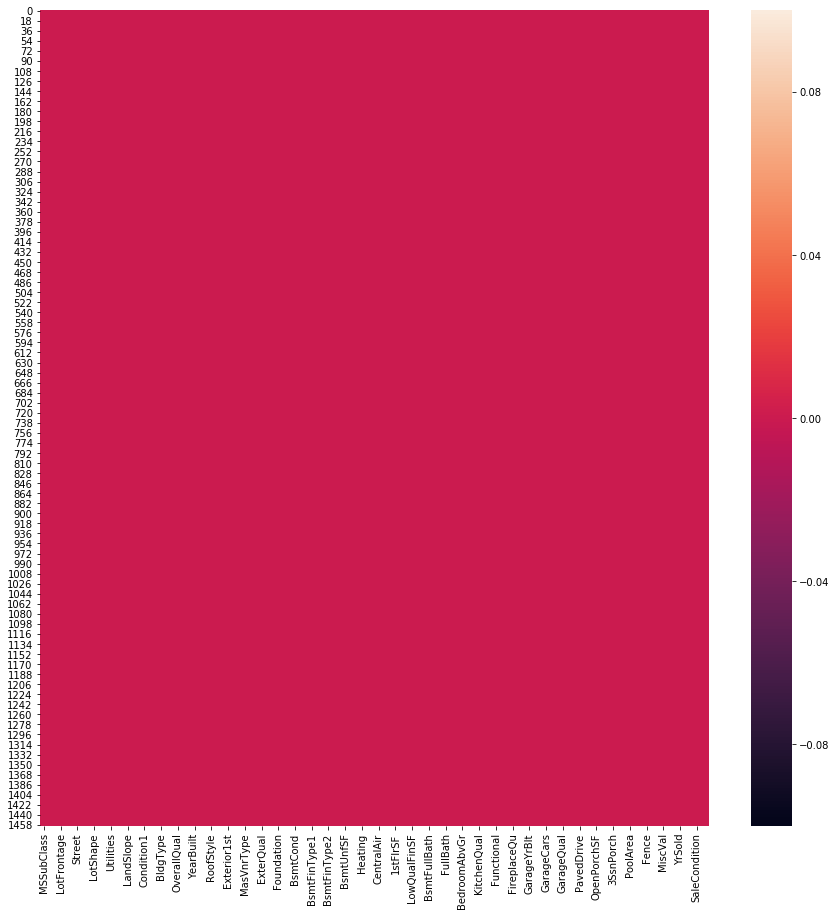

In [71]:
# to see missing value after treatment , we plot figure

plt.figure(figsize = (15,15))
sns.heatmap(dataset.isnull())

can see cleared all white shades from plot

In [72]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [73]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NoFire,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,NoMisc,0,2,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,NoMasonry,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,NoMisc,0,5,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,NoMisc,0,9,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,NoMasonry,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,NoMisc,0,2,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,NoMisc,0,12,2008,WD,Normal,12.429216


# Transforming numerical variables that are really categorical

In [74]:
# converting columns in str which have categorical nature but in int64
# 'YearBuilt', 'YearRemodAdd', 'YrSold','Overallcond', 'OverallQual'
feat_dtype_convert = ['MSSubClass','OverallCond', 'OverallQual']
for i in feat_dtype_convert:
    dataset[i] = dataset[i].astype(str)

In [ ]:
#dataset['Functional'].value_counts()

In [ ]:
#dataset['BsmtExposure'] = dataset['BsmtExposure'].astype(CategoricalDtype(categories=['NoBsmt', 'Mn', 'Gd', 'Av', 'No'], ordered = True)).cat.codes

In [ ]:
#dataset['BsmtCond'] = dataset['BsmtCond'].astype(CategoricalDtype(categories=['Po', 'NoBsmt', 'Fa', 'Gd', 'TA'], ordered = True)).cat.codes

In [ ]:
#dataset['BsmtQual'] = dataset['BsmtQual'].astype(CategoricalDtype(categories=['NoBsmt', 'Fa', 'Ex', 'Gd', 'TA'], ordered = True)).cat.codes

In [ ]:
#dataset['BsmtFinType1'] = dataset['BsmtFinType1'].astype(CategoricalDtype(categories=['NoBsmt', 'LwQ', 'BLQ','Rec','ALQ', 'GLQ','Unf'], ordered = True)).cat.codes
#dataset['BsmtFinType2'] = dataset['BsmtFinType2'].astype(CategoricalDtype(categories=['GLQ', 'ALQ', 'BLQ', 'NoBsmt', 'LwQ','Rec', 'Unf'], ordered = True)).cat.codes


In [ ]:
#dataset['ExterQual'] = dataset['ExterQual'].astype(CategoricalDtype(categories=['Fa', 'Ex', 'Gd', 'TA'], ordered = True)).cat.codes
#dataset['ExterCond'] = dataset['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Ex', 'Fa', 'Gd', 'TA'], ordered = True)).cat.codes
#dataset['Functional'] = dataset['Functional'].astype(CategoricalDtype(categories=['NoFunction', 'Sev', 'Maj2', 'Maj1', 'Mod','Min1','Min2', 'Typ'], ordered = True)).cat.codes

In [ ]:
#dataset['GarageCond'] = dataset['GarageCond'].astype(CategoricalDtype(categories=['Ex', 'Po', 'Gd', 'Fa', 'NoGrg', 'TA'], ordered = True)).cat.codes
#dataset['GarageQual'] = dataset['GarageQual'].astype(CategoricalDtype(categories=['Ex', 'Po', 'Gd', 'Fa', 'NoGrg', 'TA'], ordered = True)).cat.codes
#dataset['GarageFinish'] = dataset['GarageFinish'].astype(CategoricalDtype(categories=['NoGrg ', 'Fin', 'RFn','Unf'], ordered = True)).cat.codes
##dataset['HeatingQC'] = dataset['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'Gd', 'TA', 'Ex'], ordered = True)).cat.codes
#dataset['KitchenQual'] = dataset['KitchenQual'].astype(CategoricalDtype(categories=['Fa', 'Ex', 'Gd', 'TA'], ordered = True)).cat.codes
#dataset['PavedDrive'] = dataset['PavedDrive'].astype(CategoricalDtype(categories=['P', 'N', 'Y'], ordered = True)).cat.codes
#dataset['Utilities'] = dataset['Utilities'].astype(CategoricalDtype(categories=['NoSeWa','NoUtilites','AllPub'], ordered = True)).cat.codes

In [75]:
# conver in month abbrevation
import calendar
dataset['MoSold'] = dataset['MoSold'].apply(lambda x : calendar.month_abbr[x])

In [76]:
dataset['MoSold'].value_counts()

Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64

In [77]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NoFire,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,NoMisc,0,Feb,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,NoMasonry,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,NoMisc,0,May,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,NoMisc,0,Sep,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,NoMasonry,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,NoMisc,0,Feb,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,NoMisc,0,Dec,2008,WD,Normal,12.429216


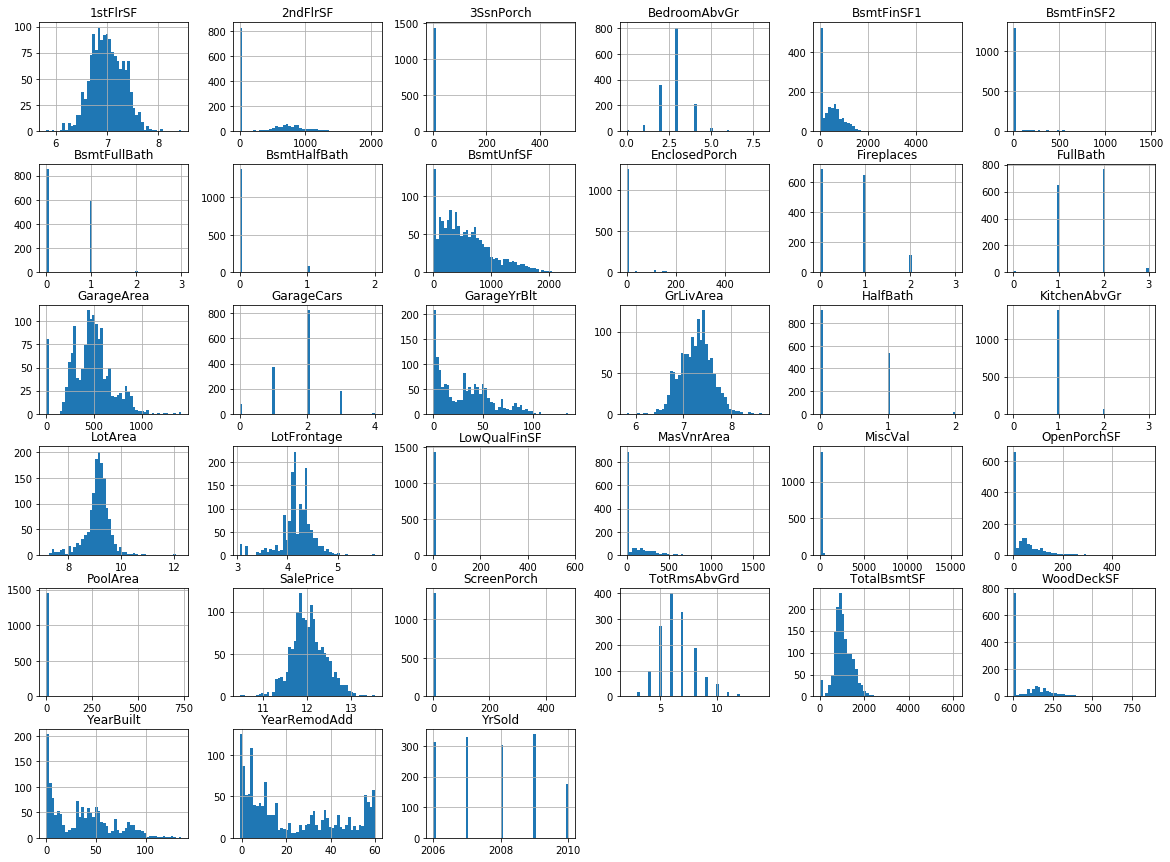

In [78]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

 we can see many continuous features are skewed in nature hence need to perfom log transformation 

In [79]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,4.174387,9.041922,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1,0,2,1,3,1,Gd,8,Typ,0,NoFire,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NoPool,NoFence,NoMisc,0,Feb,2008,WD,Normal,12.247694
1,20,RL,4.382027,9.169518,Pave,NoAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,NoMasonry,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NoPool,NoFence,NoMisc,0,May,2007,WD,Normal,12.109011
2,60,RL,4.219508,9.328123,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NoPool,NoFence,NoMisc,0,Sep,2008,WD,Normal,12.317167
3,70,RL,4.094345,9.164296,Pave,NoAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,NoMasonry,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NoPool,NoFence,NoMisc,0,Feb,2006,WD,Abnorml,11.849398
4,60,RL,4.430817,9.565214,Pave,NoAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NoPool,NoFence,NoMisc,0,Dec,2008,WD,Normal,12.429216


In [ ]:
#import numpy as np
#num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log1p(dataset[feature])

In [ ]:


plt.figure(dpi = 70)
dataset["SalePrice"] = np.log1p(dataset["SalePrice"])


sns.distplot(dataset['SalePrice'] , fit=norm)

In [ ]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

can see skewness has been reduced 

In [ ]:
# get object feature to conver in numeric using dummy variable
#obj_col = list(dataset.loc[:,dataset.dtypes == 'object'].columns.values)
len(obj_col)

In [ ]:
dataset.head(10)

In [ ]:
#categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
#for feature in categorical_features:
  #  labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
   # labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
   #dataset[feature]=dataset[feature].map(labels_ordered)

# Need to perform LabelEncoder for categorical columns as Ordinal categories 

In [80]:
from sklearn.preprocessing import LabelEncoder


categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']


for feature in categorical_features:  
    
    lbl = LabelEncoder() 
    
    lbl.fit(list(dataset[feature].values)) 
    
    dataset[feature] = lbl.transform(list(dataset[feature].values))

       
print('Shape dataset: {}'.format(dataset.shape))

Shape dataset: (1460, 80)


In [81]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,9,3,4.174387,9.041922,1,1,3,3,0,4,0,5,2,2,0,5,7,4,5,5,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,0,1,4,6.752270,854,0,7.444249,1,0,2,1,3,1,2,8,6,0,3,1,5.0,2,2.0,548.0,5,5,2,0,61,0,0,0,0,3,4,1,0,3,2008,8,4,12.247694
1,4,3,4.382027,9.169518,1,1,3,3,0,2,0,24,1,2,0,2,6,7,31,31,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,4,7.140453,0,0,7.140453,0,1,2,0,3,1,3,6,6,1,5,1,31.0,2,2.0,460.0,5,5,2,298,0,0,0,0,0,3,4,1,0,8,2007,8,4,12.109011
2,9,3,4.219508,9.328123,1,1,0,3,0,4,0,5,2,2,0,5,7,4,7,6,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,0,1,4,6.824374,866,0,7.487734,1,0,2,1,3,1,2,6,6,1,5,1,7.0,2,2.0,608.0,5,5,2,0,42,0,0,0,0,3,4,1,0,11,2008,8,4,12.317167
3,10,3,4.094345,9.164296,1,1,0,3,0,0,0,6,2,2,0,5,7,4,91,36,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,2,1,4,6.867974,756,0,7.448334,1,0,1,0,3,1,2,7,6,1,2,5,8.0,3,3.0,642.0,5,5,2,0,35,272,0,0,0,3,4,1,0,3,2006,8,0,11.849398
4,9,3,4.430817,9.565214,1,1,0,3,0,2,0,15,2,2,0,5,8,4,8,8,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,0,1,4,7.043160,1053,0,7.695303,1,0,2,1,4,1,2,9,6,1,5,1,8.0,2,3.0,836.0,5,5,2,192,84,0,0,0,0,3,4,1,0,2,2008,8,4,12.429216


# All Features have different scale hence will perform MinMaxScaler

In [82]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['SalePrice'] ]
len(scaling_feature)



79

In [83]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

# Feature Scaling 

In [84]:
feature_scale=[feature for feature in dataset.columns if feature not in ['SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])


MinMaxScaler()

In [85]:
scaler.transform(dataset[feature_scale])

array([[0.64285714, 0.75      , 0.41820812, ..., 0.5       , 1.        ,
        0.8       ],
       [0.28571429, 0.75      , 0.49506375, ..., 0.25      , 1.        ,
        0.8       ],
       [0.64285714, 0.75      , 0.434909  , ..., 0.5       , 1.        ,
        0.8       ],
       ...,
       [0.71428571, 0.75      , 0.42385922, ..., 1.        , 1.        ,
        0.8       ],
       [0.28571429, 0.75      , 0.434909  , ..., 1.        , 1.        ,
        0.8       ],
       [0.28571429, 0.75      , 0.47117546, ..., 0.5       , 1.        ,
        0.8       ]])

In [86]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [87]:
data.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,12.247694,0.642857,0.75,0.418208,0.366344,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.036765,0.098361,0.2,0.142857,0.857143,0.866667,0.333333,0.12250,0.666667,1.0,0.4,0.5,1.00,0.75,0.333333,0.125089,1.0,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.356155,0.413559,0.0,0.577712,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.6,0.166667,0.036765,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.272727,0.50,1.0,0.8
1,12.109011,0.285714,0.75,0.495064,0.391317,1.0,0.5,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.666667,0.875,0.227941,0.524590,0.2,0.142857,0.571429,0.533333,0.666667,0.00000,1.000000,1.0,0.2,0.5,1.00,0.25,0.000000,0.173281,1.0,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.503056,0.000000,0.0,0.470245,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.166667,0.227941,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.727273,0.25,1.0,0.8
2,12.317167,0.642857,0.75,0.434909,0.422359,1.0,0.5,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.051471,0.114754,0.2,0.142857,0.857143,0.866667,0.333333,0.10125,0.666667,1.0,0.4,0.5,1.00,0.50,0.333333,0.086109,1.0,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.383441,0.419370,0.0,0.593095,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.166667,0.051471,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,1.000000,0.50,1.0,0.8
3,11.849398,0.714286,0.75,0.388581,0.390295,1.0,0.5,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.777778,0.500,0.669118,0.606557,0.2,0.142857,0.928571,1.000000,0.666667,0.00000,1.000000,1.0,0.0,1.0,0.25,0.75,0.000000,0.038271,1.0,0.0,0.231164,0.123732,0.2,0.5,1.0,1.0,0.399941,0.366102,0.0,0.579157,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.333333,0.4,0.833333,0.058824,1.000000,0.75,0.452750,1.0,1.0,1.0,0.000000,0.063985,0.492754,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.272727,0.00,1.0,0.0
4,12.429216,0.642857,0.75,0.513123,0.468761,1.0,0.5,0.0,1.0,0.0,0.5,0.0,0.625000,0.250,0.285714,0.0,0.714286,0.888889,0.500,0.058824,0.147541,0.2,0.142857,0.857143,0.866667,0.333333,0.21875,0.666667,1.0,0.4,0.5,1.00,0.00,0.333333,0.116052,1.0,0.0,0.209760,0.187398,0.2,0.0,1.0,1.0,0.466237,0.509927,0.0,0.666523,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.0,0.166667,0.058824,0.666667,0.75,0.589563,1.0,1.0,1.0,0.224037,0.153565,0.000000,0.0,0.0,0.0,1.0,1.0,0.25,0.0,0.181818,0.50,1.0,0.8


# Feature Selection 

will select feature which has good amount of correlation with Target Variable , which gives better accuracy of our Model 

In [88]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)


In [89]:
## Capture the dependent feature
y_train=data[['SalePrice']]

In [90]:
## drop dependent feature from dataset
X_train=data.drop(['SalePrice'],axis=1)

In [91]:
# use selectFromModel object


feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)


SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [92]:
feature_sel_model.get_support()

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True, False, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True])

In [93]:
selected_feature = X_train.columns[(feature_sel_model.get_support())]

In [94]:
selected_feature

Index(['LotShape', 'BldgType', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars',
       'PavedDrive', 'SaleCondition'],
      dtype='object')

In [95]:
X_train = X_train[selected_feature]

In [96]:
X_train.head()

,LotShape,BldgType,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,FullBath,KitchenQual,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive,SaleCondition
0,1.0,0.0,0.777778,0.036765,0.098361,0.666667,0.5,0.75,0.333333,0.0,1.0,0.356155,0.577712,0.666667,0.666667,1.0,0.000000,0.166667,0.666667,0.50,1.0,0.8
1,1.0,0.0,0.666667,0.227941,0.524590,1.000000,0.5,0.25,0.000000,0.0,1.0,0.503056,0.470245,0.666667,1.000000,1.0,0.333333,0.166667,0.666667,0.50,1.0,0.8
2,0.0,0.0,0.777778,0.051471,0.114754,0.666667,0.5,0.50,0.333333,0.0,1.0,0.383441,0.593095,0.666667,0.666667,1.0,0.333333,0.166667,0.666667,0.50,1.0,0.8
3,0.0,0.0,0.777778,0.669118,0.606557,1.000000,1.0,0.75,0.000000,0.5,1.0,0.399941,0.579157,0.333333,0.666667,1.0,0.333333,0.833333,1.000000,0.75,1.0,0.0
4,0.0,0.0,0.888889,0.058824,0.147541,0.666667,0.5,0.00,0.333333,0.0,1.0,0.466237,0.666523,0.666667,0.666667,1.0,0.333333,0.166667,0.666667,0.75,1.0,0.8


In [97]:
data.to_csv('X_train.csv',index=False)